In [1]:
import pandas as pd
import numpy as np
import seaborn as sns   
import regex as re
import datetime as dt
import statistics as stats
import matplotlib.pyplot as plt

#### Brazil Food delivery

- source: https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center
- retrieved from the business's database
- data contains no ambiguity and is informative.

In [2]:
df_bz_driver= pd.read_csv('food_center_brazil/drivers.csv')
df_bz_driver.head()

,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE
3,143,BIKER,FREELANCE
4,148,MOTOBOY,FREELANCE


In [3]:
df_bz_channel= pd.read_csv('food_center_brazil/channels.csv')
df_bz_channel.head()

,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL
3,4,FACE PLACE,OWN CHANNEL
4,5,FOOD PLACE,MARKETPLACE


In [4]:
df_bz_payment = pd.read_csv('food_center_brazil/payments.csv')
df_bz_payment.head()

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID
4,4427955,68414018,45.80,0.92,ONLINE,PAID


In [5]:
df_bz_delivery = pd.read_csv('food_center_brazil/deliveries.csv')
df_bz_delivery.head()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED
3,2174663,68412721,8378.0,5714.0,DELIVERED
4,2174675,68414018,10463.0,3746.0,DELIVERED


In [6]:
df_bz_store = pd.read_excel('food_center_brazil/stores.xlsx',)
df_bz_store.head()

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.203520
3,53,8,PAPA SUCIS,FOOD,0.0,-22.921475,-43.234822
4,54,8,VUZPI PAZZIS,FOOD,0.0,-22.921475,-43.234822


In [7]:
df_bz_hub = pd.read_excel('food_center_brazil/hubs.xlsx',)
df_bz_hub.head()

,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382
3,5,FUNK SHOPPING,RIO DE JANEIRO,RJ,-23.000750,-43.318282
4,8,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.921475,-43.234774


In [8]:
df_bz_order = pd.read_csv('food_center_brazil/orders.csv')
df_bz_order = df_bz_order[df_bz_order.order_status != 'CANCELED']

df_bz_order = pd.merge(
    left  = df_bz_order, right = df_bz_payment, on='payment_order_id', how = 'left'
)
df_bz_order = pd.merge(
    left  = df_bz_order, right = df_bz_delivery, on='delivery_order_id', how = 'left'
)
df_bz_order = pd.merge(
    left  = df_bz_order, right = df_bz_store, on='store_id', how = 'left'
)
df_bz_order = pd.merge(
    left  = df_bz_order, right = df_bz_hub, on='hub_id', how = 'left'
)
df_bz_order = pd.merge(
    left  = df_bz_order, right = df_bz_driver, on='driver_id', how = 'left'
)

df_bz_order.head()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,store_plan_price,store_latitude,store_longitude,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,driver_modal,driver_type
0,68410055,2181,35,68410055,68410055,FINISHED,394.80,0.01,6.00,2,...,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218,BIKER,FREELANCE
1,68410055,2181,35,68410055,68410055,FINISHED,394.80,0.01,6.00,2,...,29.0,-22.887521,-43.283366,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218,BIKER,FREELANCE
2,68412721,631,5,68412721,68412721,FINISHED,195.05,11.90,10.93,14,...,NaN,-23.595775,-46.685984,RAP SHOPPING,S肙 PAULO,SP,-23.595001,-46.685984,MOTOBOY,FREELANCE
3,68413340,631,5,68413340,68413340,FINISHED,46.90,11.90,11.36,14,...,NaN,-23.595775,-46.685984,RAP SHOPPING,S肙 PAULO,SP,-23.595001,-46.685984,MOTOBOY,FREELANCE
4,68414018,3265,5,68414018,68414018,FINISHED,45.80,0.00,10.28,14,...,49.9,-23.507105,-46.718197,RIVER SHOPPING,S肙 PAULO,SP,-23.507105,-46.718197,MOTOBOY,LOGISTIC OPERATOR


In [35]:
df_bz_order.shape

(424902, 51)

In [9]:
df_bz_order.columns.values

array(['order_id', 'store_id', 'channel_id', 'payment_order_id',
       'delivery_order_id', 'order_status', 'order_amount',
       'order_delivery_fee', 'order_delivery_cost', 'order_created_hour',
       'order_created_minute', 'order_created_day', 'order_created_month',
       'order_created_year', 'order_moment_created',
       'order_moment_accepted', 'order_moment_ready',
       'order_moment_collected', 'order_moment_in_expedition',
       'order_moment_delivering', 'order_moment_delivered',
       'order_moment_finished', 'order_metric_collected_time',
       'order_metric_paused_time', 'order_metric_production_time',
       'order_metric_walking_time', 'order_metric_expediton_speed_time',
       'order_metric_transit_time', 'order_metric_cycle_time',
       'payment_id', 'payment_amount', 'payment_fee', 'payment_method',
       'payment_status', 'delivery_id', 'driver_id',
       'delivery_distance_meters', 'delivery_status', 'hub_id',
       'store_name', 'store_segment', 'st

In [10]:
pat_date = r'(?P<month>\d{,2})/(?P<day>\d{,2})/(?P<year>\d{4}) (?P<h>\d{,2}):(?P<m>\d{,2}):(?P<s>\d{,2})'

def get_date(s):
    search = re.search(pattern=pat_date, string=str(s))
    if search:
        return dt.datetime(int(search['year']), int(search['month']), int(search['day']), int(search['h']), int(search['m']), int(search['s']))
    else:
        return s

In [11]:
df_bz_order[['order_moment_created', 'order_moment_finished']] = df_bz_order[['order_moment_created', 'order_moment_finished']].applymap(get_date)
df_bz_order = df_bz_order.dropna(how = 'any', subset=['order_moment_created', 'order_moment_finished'])

In [12]:
df_bz_order.duplicated().sum()

0

In [13]:
df_bz_order = df_bz_order[df_bz_order.order_amount < 40000]

Text(0, 0.5, 'daily demand')

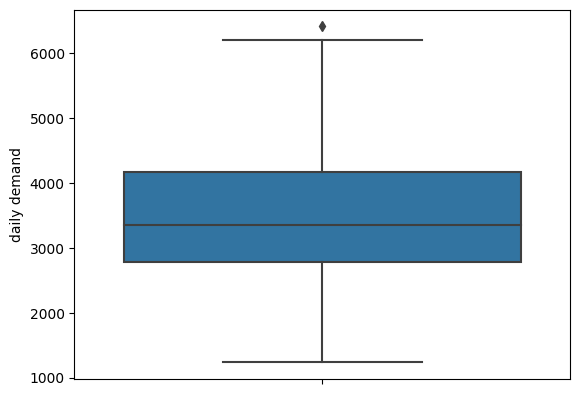

In [14]:
df_temp = df_bz_order.set_index('order_moment_created').resample('1D').count()['order_id'].to_frame()
sns.boxplot(data= df_temp, y = 'order_id')
plt.ylabel('daily demand')

#### <b>Demand analysis</b>

Text(0.5, 1.0, 'daily demand over time')

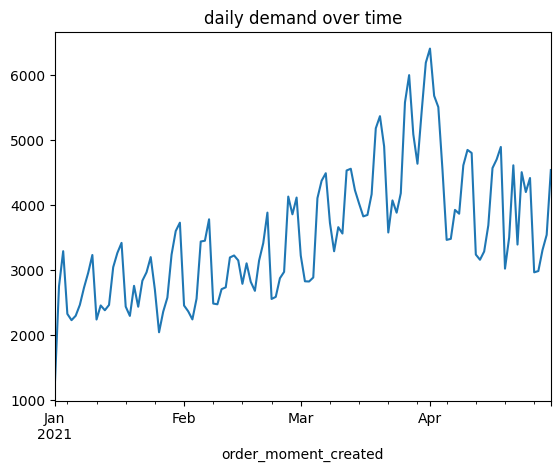

In [15]:
df_bz_order.set_index('order_moment_created').resample('1D').count()['order_id'].plot().set_title('daily demand over time')

C:\Users\Chaconne\AppData\Local\Temp\ipykernel_18792\1242804273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.order_moment_created = df_temp.order_moment_created.map(


Text(0.5, 1.0, 'daily demand by center')

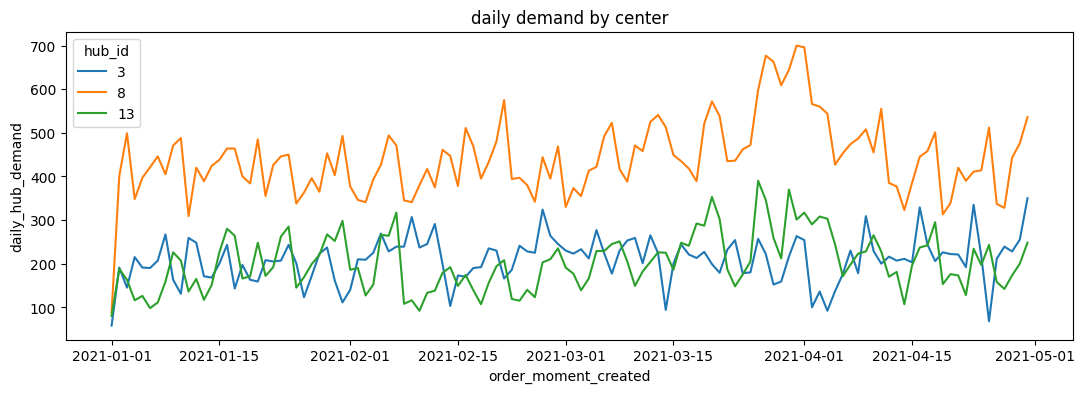

In [16]:
df_temp = df_bz_order[
    (df_bz_order.hub_id == 3) |
    (df_bz_order.hub_id == 8) |
    (df_bz_order.hub_id == 13)
]

df_temp.order_moment_created = df_temp.order_moment_created.map(
    lambda  d: dt.datetime(d.year, d.month, d.day)
)
df_temp = df_temp.groupby(['order_moment_created', 'hub_id']).agg(
    daily_hub_demand = pd.NamedAgg(column='order_id', aggfunc='count')
).reset_index()
df_temp.hub_id = df_temp.hub_id.astype(str)

plt.figure(figsize=(13,4))
sns.lineplot(data = df_temp, x = 'order_moment_created', y = 'daily_hub_demand', hue = 'hub_id',).set_title('daily demand by center')

#### <b>Price(Order amount) analysis</b>

(0.0, 1000.0)

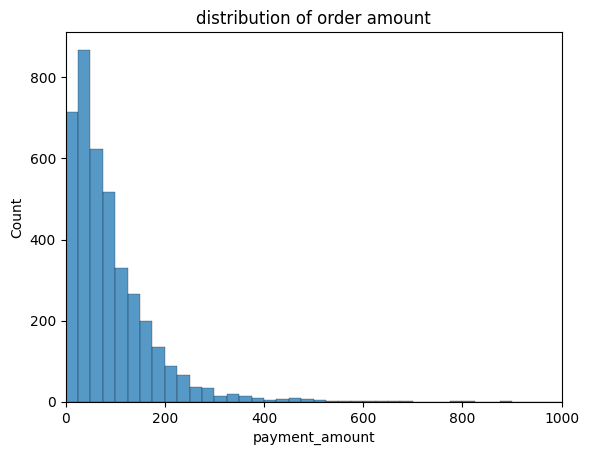

In [34]:
df_temp = df_bz_order.sample(n = 4000)


sns.histplot(data = df_temp, x = 'payment_amount', binwidth = 25).set_title("distribution of order amount")
plt.xlim(0, 1000)

Text(0.5, 1.0, 'daily average payment amount over time')

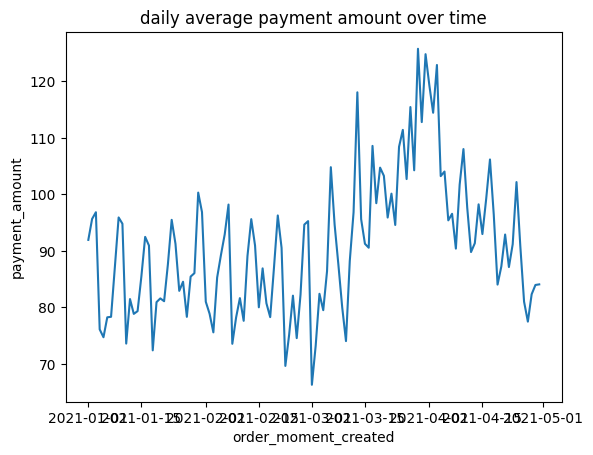

In [21]:
df_temp = df_bz_order.set_index('order_moment_created')[['payment_amount']].resample('1D').mean().reset_index()
sns.lineplot(data = df_temp, x = 'order_moment_created', y= 'payment_amount').set_title('daily average payment amount over time')

C:\Users\Chaconne\AppData\Local\Temp\ipykernel_18792\1495915135.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['diff_amount'] = df_temp.payment_amount  - df_temp.order_amount


<AxesSubplot:xlabel='diff_amount', ylabel='Count'>

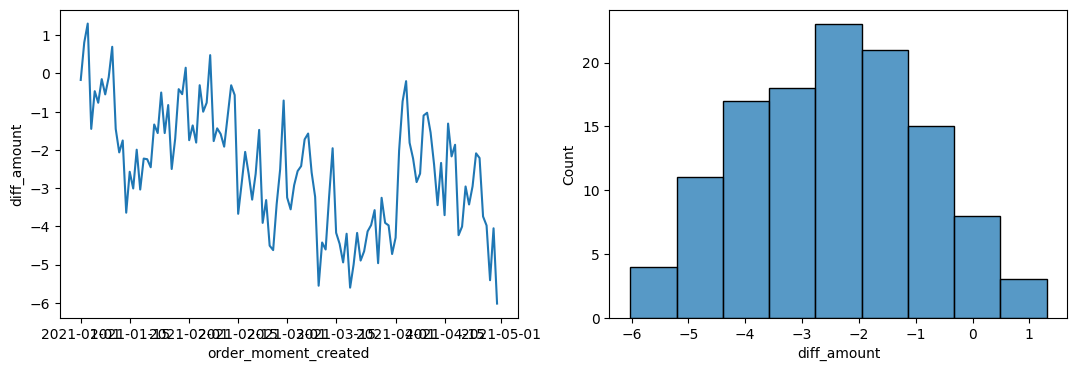

In [28]:
fig, ax =plt.subplots(1,2)
fig.set_figwidth(13)
fig.set_figheight(4)


df_temp = df_bz_order[['order_moment_created', 'payment_amount', 'order_amount']]
df_temp['diff_amount'] = df_temp.payment_amount  - df_temp.order_amount
df_temp = df_temp.set_index('order_moment_created').resample('1d').mean()


plt.subplot(1,2,1)
sns.lineplot(data = df_temp, x = 'order_moment_created', y ='diff_amount')


plt.subplot(1,2,2)
sns.histplot(data = df_temp, x = 'diff_amount',)

#### <b>Supply analysis</b>

,driver_count,order_count,order_driver_ratio
hub_id,,,
3,173,20280,117.225434
8,629,42994,68.352941
13,292,20602,70.554795
16,223,18571,83.278027
17,229,13234,57.790393


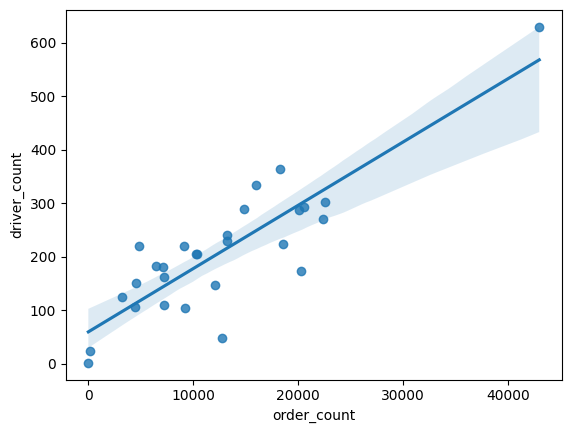

In [33]:
df_temp = df_bz_order.groupby(['hub_id']).agg(
    driver_count = pd.NamedAgg(column = 'driver_id', aggfunc =lambda c: len(np.unique(c))),
    order_count = pd.NamedAgg(column = 'order_id', aggfunc =lambda c: len(np.unique(c))),
)
df_temp['order_driver_ratio'] = df_temp.order_count / df_temp.driver_count


sns.regplot(data = df_temp, x = 'order_count', y = 'driver_count')

df_temp.head()

In [6]:
def wrapper(func, *args):
    def wrapped(s):
        print('start')
        func(s)
        print('end')
    return  wrapped


@wrapper
def func(s):
    print(s)


func('321')

TypeError: wrapper.<locals>.wrapped() takes 1 positional argument but 2 were given